Consider a specific SDE
$$\mathrm{d}X_t^{t_0}=-10\pi X_t^{t_0}\mathrm{d}t+\sin{(2\pi t)}\mathrm{d}t+\mathrm{d}W_t $$

Path $\hat{X}_t^*(\omega)\approx \hat{X}_t^{-10}(\omega)$ for $-4\leq t\leq -1$ and $\hat{X}_t^*(\theta_{-1} \omega)\approx \hat{X}_t^{-10}(\theta_{-1} \omega)$  for $-3\leq t\leq 0$ with stepsize=$\frac{1}{10^N}$

Note that $\theta_sW_t=W_{t+s}-W_s$ and $\hat{X}_t^*(\theta_{-1}\omega)=\hat{X}_{t-1}^*(\omega)$

In [1]:
import numpy as np
import random
import time
from matplotlib.pylab import *
import matplotlib.pyplot as plt
from scipy.stats import linregress
from pylab import *
from scipy import optimize
np.random.seed(1109)

In [2]:
def BMBase(T,h,shiftT):
    """
    Generating 1-dimensional BM with M realizations and N increments for [-T,0] (finest level)
    """
    assert T>np.abs(shiftT)
    N=int(T/h) #The number of sub-intervals#
    
    np.random.seed(42)
    dw = np.sqrt(h)*np.random.randn(N) 
    W = np.insert(np.cumsum(dw),0,0)[::-1]

    
    if shiftT>0:
        NN=int(shiftT/h)
        
        return W,W[NN:]-W[NN]
    else:
        NN=int(-shiftT/h)        
  
        return W,W[:-NN]-W[-NN]     

In [31]:
def f(x, t):
    """
    drift term for Eqn. final
    """

    return -10*np.pi*x+np.sin(2*np.pi*t)


def g(sigma,dW):
    """
    difussion term for Eqn. final
    """
    return sigma*dW


In [4]:
def BackwardEuler(y_ini,h,t_ini, f,g1):
    """
    BackwardEuler scheme implemented for Eqn
    """
    
     ####### solve implicit euler equtian for next time step with newton method
    def implicit_(y):
        return y - y_ini -f(y,t_ini+h)*h -g1
        
    return optimize.newton(implicit_,y_ini)

def Euler(x_ini,h,f1,g1):
    """
    Euler scheme implemented for Eqn
    """
    return x_ini+f1*h+g1

In [39]:
def path_class(x0,Dt,W,t_initial):
    """
    path simulated up to time T based on level NNN
    """

    
    N=len(W)
    
    #Initiating paths 
    X1,X2=np.zeros(N),np.zeros(N)
    X1[0],X2[0] =x0,x0 
    
        
    for i in range(N)[1:]:
        #1-dim increments for BM of level NN (without considering BB)
        dW1=W[i]-W[i-1] 
        #Evaluating coefficient functions
        
        t_pre=t_initial+(i-1)*Dt
        f1 =f(X1[i-1], t_pre)

        g1 =g(0.05,dW1)
        #Evaluating the path values for the next step
        X1[i]=Euler(X1[i-1],Dt,f1,g1)           
        X2[i]=BackwardEuler(X1[i-1],Dt,t_pre, f,g1)
        
    return X1,X2

In [40]:
T,Dt,shiftT=10,0.05,-1
W,W_shifted=BMBase(T,Dt,shiftT)
x0,t_initial=0.2,-T


In [41]:
Ye,Ybe=path_class(x0,Dt,W,t_initial)
Ye_,Ybe_=path_class(-0.3,Dt,W,t_initial)

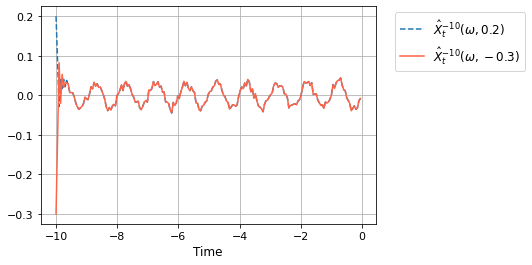

In [11]:
fontsize=12
plt.plot((np.arange(len(Ybe))/len(Ybe)-1)*T,Ybe,
         color='#1f77b4',linestyle="--",label=r"$\hat{X}_t^{-10}(\omega,0.2)$")

plt.plot((np.arange(len(Ybe_))/len(Ybe_)-1)*T,Ybe_,
         color='tomato',linestyle="-",label=r"$\hat{X}_t^{-10}(\omega,-0.3)$")
plt.legend(fontsize=fontsize,bbox_to_anchor=(1.04,1), loc="upper left")

plt.grid()
plt.xticks(fontsize=fontsize - 1)
plt.yticks(fontsize=fontsize - 1)

plt.xlabel('Time', fontsize=fontsize)
#plt.ylabel('Trajectory', fontsize=fontsize)
plt.savefig("./plots/" + "different_initial_conditions.jpeg", dpi=350,bbox_inches='tight')

In [43]:
Ye_shifted,Ybe_shifted=path_class(x0,Dt,W_shifted,t_initial)

In [44]:
Ye_shifted,Ybe_shifted=path_class(x0,Dt,W_shifted,t_initial)

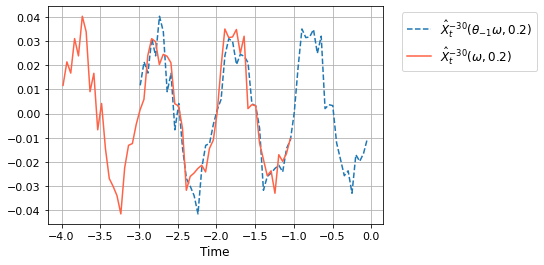

In [15]:
M=int(1/Dt)
fontsize=12
plt.plot((np.arange(len(Ybe_shifted))/len(Ybe_shifted)-1)[-3*M:]*(T+shiftT),Ybe_shifted[-3*M:],
         color='#1f77b4',linestyle="--",label=r"$\hat{X}_t^{-30}(\theta_{-1}\omega,0.2)$")

plt.plot((np.arange(len(Ybe))/len(Ybe)-1)[-4*M:-M]*T,Ybe[-4*M:-M],
         color='tomato',linestyle="-",label=r"$\hat{X}_t^{-30}(\omega,0.2)$")
plt.legend(fontsize=fontsize,bbox_to_anchor=(1.04,1), loc="upper left")

plt.grid()
plt.xticks(fontsize=fontsize - 1)
plt.yticks(fontsize=fontsize - 1)

plt.xlabel('Time', fontsize=fontsize)
#plt.ylabel('Trajectory', fontsize=fontsize)
plt.savefig("./plots/" + "path_simulation.jpeg", dpi=350, bbox_inches='tight')

Now consider $X_t^{t_0}(\theta_{-t}\omega)$

\begin{align*}
\mathrm{d}X_t^{t_0}(\theta_{-r}\omega)&=-10\pi X_t^{t_0}(\theta_{-r}\omega)\mathrm{d}t+\sin{(2\pi t)}\mathrm{d}t+\mathrm{d}W_{t}(\theta_{-r}\omega)\\
&=-10\pi X_t^{t_0}(\theta_{-r}\omega)\mathrm{d}t+\sin{(2\pi t)}\mathrm{d}t+\mathrm{d}W_{t-r}
\end{align*}


Set $t_0=0$. Note $X_{0}^{0}(\omega)=x_0$

In [37]:
T,Dt,shiftT=10,0.05,-1
W2,_=BMBase(T,Dt,shiftT)
x20,t2_initial=0.2,-T

In [18]:
def paths_class_BEuler(x0,Dt,W,t_initial):
    """
    path simulated up to time T based on level NNN
    """

    
    len_W=len(W)
    
    X2=[path_class(x0,Dt,W[i:],t_initial)[1][-1] for i in range(len_W)[:-1]]
        
    return np.array(X2)

In [19]:
def paths_class_Euler(x0,Dt,W,t_initial):
    """
    path simulated up to time T based on level NNN
    """

    
    len_W=len(W)
    
    X2=[path_class(x0,Dt,W[i:],t_initial)[0][-1] for i in range(len_W)[:-1]]
        
    return np.array(X2)

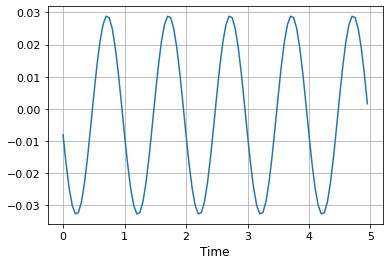

In [24]:
plt.plot(np.arange(len(Ybe2[:-100]))*Dt,Ybe2[:-100])
fontsize=12
plt.grid()
plt.xticks(fontsize=fontsize - 1)
plt.yticks(fontsize=fontsize - 1)

plt.xlabel('Time', fontsize=fontsize)
#plt.ylabel('Trajectory', fontsize=fontsize)
plt.savefig("./plots/" + "paths_simulation.jpeg", dpi=350)